# Check for hotter-is-better pattern for $r_m$

In [1]:
rm(list=ls())
graphics.off()

require('tidyverse')
require('cowplot')
require('patchwork')

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: cowplot

Loading required package: patchwork


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [2]:
# Plot mass corrected value of $r_m$ at Topt against the peak temperature for $r_m$

rm_data <- read_csv('../results/rm_optSizeScaling.csv') %>% 
           group_by(species) %>% 
           slice(which.max(rm_opt)) %>%
           arrange(curve_ID)

head(rm_data)

Rows: 16000 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): species
dbl (19): temp, alpha, alphaLwr, alphaUpr, curve_ID, bmax, bmaxLwr, bmaxUpr,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,zLwr,zUpr,zj,zjLwr,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,321.769727,273.845032,1,1.436440,1.129228,1.930424,0.01799820,0.02228078,0.01475341,0.001623460,0.002049328,0.001335302,0.01,0.01029796,0.008208143,0.01269992,159.800000
Halyomorpha halys,29.77477,29.803247,35.241568,26.875962,2,6.254051,4.538958,7.910409,0.01385860,0.01828790,0.01164984,0.003232184,0.008099109,0.002981874,0.01,0.07630718,0.067891094,0.07966526,158.810000
Aedes aegypti,33.10811,5.430507,6.127184,4.917633,3,8.966715,6.927374,10.130595,0.04764627,0.06026726,0.03854270,0.099661965,0.140414289,0.074933343,0.01,0.19781352,0.183244059,0.19485723,1.999167
Anthonomus grandis,29.45946,11.006110,13.750932,9.878442,4,6.292496,5.366498,9.670260,0.04069540,0.05091190,0.03478294,0.036932530,0.040714005,0.034203990,0.01,0.14365573,0.129893787,0.15639103,15.600000
Paracoccus marginatus,27.74775,11.249195,14.172428,9.156689,5,14.925416,10.407681,44.839568,0.05028941,0.05979297,0.04598690,0.015482998,0.019625625,0.012753368,0.01,0.19174884,0.165843411,0.24313226,3.365000
Acyrthosiphon pisum,24.32432,6.716411,7.100553,6.395750,6,7.047066,6.733904,7.496022,0.08542108,0.09102305,0.08077205,0.077074000,0.095672800,0.057581816,0.01,0.22007128,0.207081189,0.23233485,2.365000


## Mass-corrected $r_{m,opt}$ vs $r_m$ $T_{pk}$'s

In [3]:
rm_data$kT <- 1/(8.617333262145 * 10^-5 * (rm_data$temp+273.15))

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



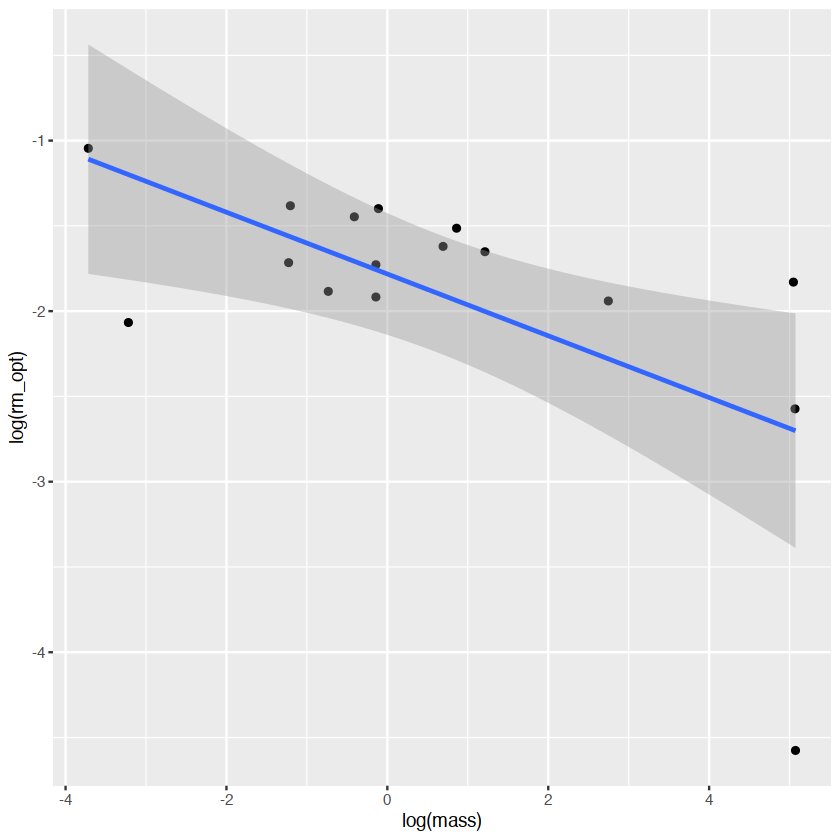

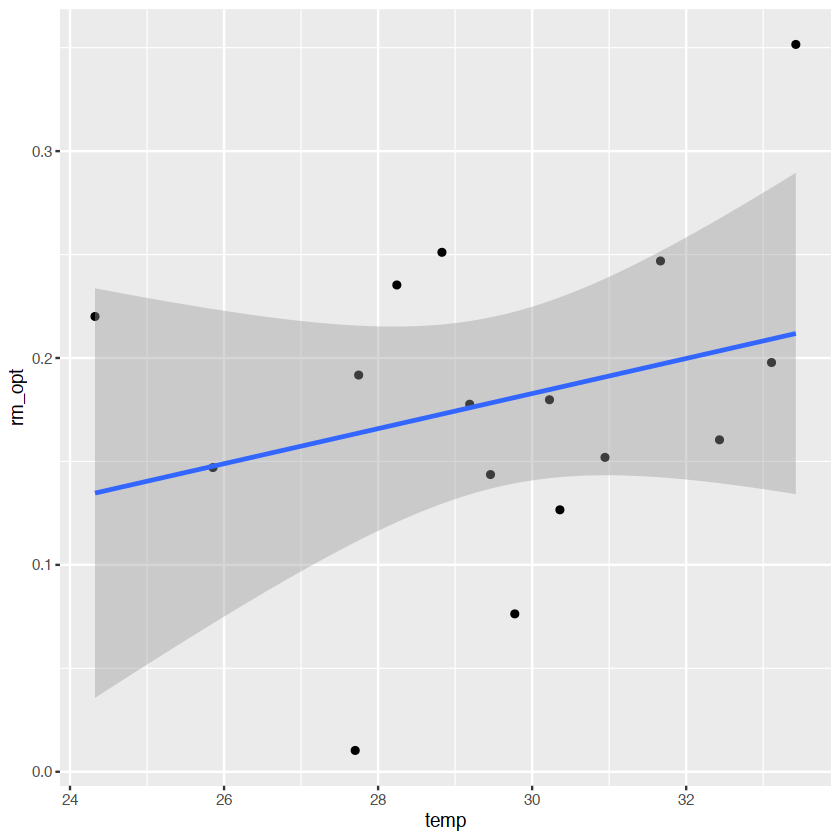

In [4]:
#plot uncorrected data in log-log scale
rm_data %>%
  ggplot(aes(x=log(mass), y = log(rm_opt)))+
  geom_point()+
  geom_smooth(method = 'lm')

#plot rm_opt vs T
rm_data %>%
  ggplot(aes(x = temp, y = rm_opt)) +
  geom_point()+
  geom_smooth(method = 'lm')

## Mass-correct $r_m$ values

In [5]:
# linear model (note the allometry is linear in log-log scale)
rm_model <- lm(log(rm_opt) ~ log(mass) + kT, data = rm_data)
summary(rm_model)
coef(rm_model)

save(rm_model,file= "../results/rm_MTE_model.Rdata")

cf <-  confint(rm_model,level = .95)
anova(rm_model)


Call:
lm(formula = log(rm_opt) ~ log(mass) + kT, data = rm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8199 -0.1019  0.1105  0.3271  0.7128 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 11.61659   20.90504   0.556   0.5879  
log(mass)   -0.17483    0.06415  -2.725   0.0173 *
kT          -0.34962    0.54546  -0.641   0.5327  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.662 on 13 degrees of freedom
Multiple R-squared:  0.3974,	Adjusted R-squared:  0.3047 
F-statistic: 4.286 on 2 and 13 DF,  p-value: 0.03718


(Intercept)   log(mass)          kT 
 11.6165942  -0.1748251  -0.3496167

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,3.5770082,3.5770082,8.1612548,0.0134803
kT,1,0.1800619,0.1800619,0.4108268,0.5326872
Residuals,13,5.6977889,0.4382915,NA,NA


In [6]:
rm_data

species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,zUpr,zj,zjLwr,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,321.769727,273.845032,1,1.436440,1.129228,1.930424,0.01799820,⋯,0.01475341,0.001623460,2.049328e-03,0.001335302,0.01,0.01029796,8.208143e-03,0.01269992,159.8000000,38.57209
Halyomorpha halys,29.77477,29.803247,35.241568,26.875962,2,6.254051,4.538958,7.910409,0.01385860,⋯,0.01164984,0.003232184,8.099109e-03,0.002981874,0.01,0.07630718,6.789109e-02,0.07966526,158.8100000,38.30825
Aedes aegypti,33.10811,5.430507,6.127184,4.917633,3,8.966715,6.927374,10.130595,0.04764627,⋯,0.03854270,0.099661965,1.404143e-01,0.074933343,0.01,0.19781352,1.832441e-01,0.19485723,1.9991667,37.89130
Anthonomus grandis,29.45946,11.006110,13.750932,9.878442,4,6.292496,5.366498,9.670260,0.04069540,⋯,0.03478294,0.036932530,4.071401e-02,0.034203990,0.01,0.14365573,1.298938e-01,0.15639103,15.6000000,38.34817
Paracoccus marginatus,27.74775,11.249195,14.172428,9.156689,5,14.925416,10.407681,44.839568,0.05028941,⋯,0.04598690,0.015482998,1.962562e-02,0.012753368,0.01,0.19174884,1.658434e-01,0.24313226,3.3650000,38.56632
Acyrthosiphon pisum,24.32432,6.716411,7.100553,6.395750,6,7.047066,6.733904,7.496022,0.08542108,⋯,0.08077205,0.077074000,9.567280e-02,0.057581816,0.01,0.22007128,2.070812e-01,0.23233485,2.3650000,39.01015
Aphis gossypii,28.24324,4.573511,4.802793,4.395092,7,3.206500,2.541898,3.752055,0.12279223,⋯,0.11783362,0.073481376,9.199846e-02,0.061698024,0.01,0.23529948,2.054818e-01,0.25439696,0.6633333,38.50291
Bemisia tabaci,30.22523,12.226305,13.082061,10.811104,8,9.793602,7.638958,11.773289,0.06851774,⋯,0.06217781,0.027618773,3.649240e-02,0.022331192,0.01,0.17981067,1.616703e-01,0.19675160,0.2931250,38.25137
Tetraneura nigriabdominalis,29.18919,8.639694,8.708838,8.576657,9,3.037762,2.609647,3.894056,0.08826039,⋯,0.08215378,0.010213679,1.235574e-02,0.008930484,0.01,0.17766166,1.705671e-01,0.18875533,0.8673000,38.38245


`geom_smooth()` using formula 'y ~ x'



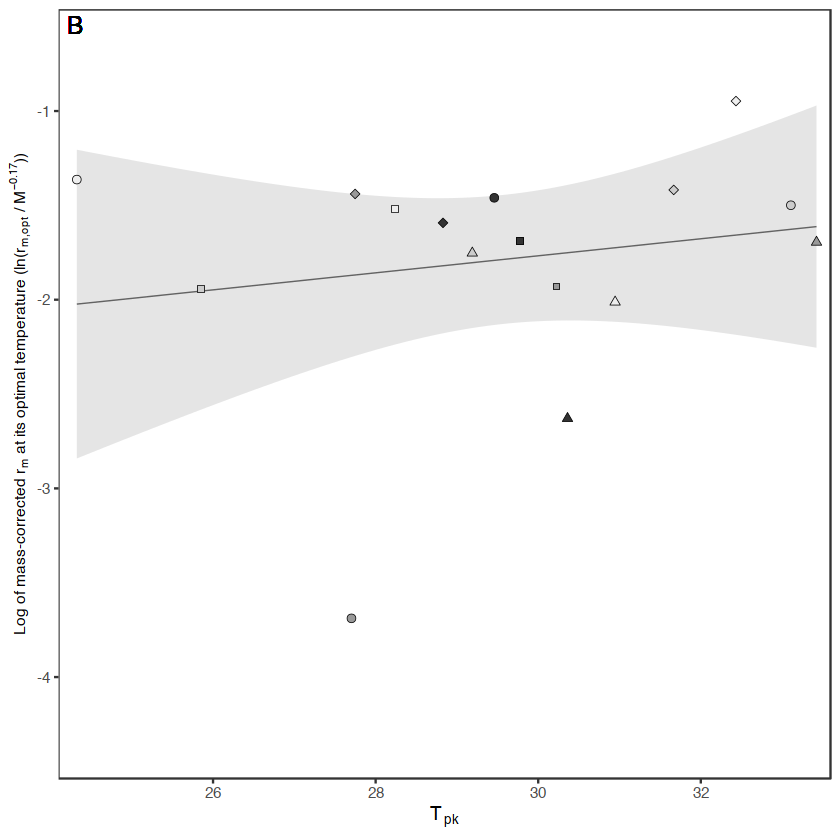

In [7]:
#plot rm_opt in 1/kT, correcting for mass
MassCorr_rm_opt <- 
rm_data %>%
  ggplot(aes(x = temp, y = log(rm_opt/mass^coef(rm_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("Log of mass-corrected ",italic(r[m]),
                                            " at its optimal temperature (ln(",
                                            italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.17),"))"))),
                     limits=c(-4.5,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(paste(italic(T[pk]))),
                     limits=c(24.1,33.6),
                     expand = c(0, 0),
                     breaks=seq(20,34, by=2))+
  geom_point(aes(shape = species, fill = species), size=2,stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.2, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "B"),size = 5, colour = "black")+
  theme(axis.title.y = element_text(size = 9))

MassCorr_rm_opt

# Analyses of $r_m$ vs distribution of trait $T_{pk}$s

#### Relationship of $r_{m,opt}$ vs distribution of trait $T_{pk}$'s

In [8]:
# sum of trait Tpks versus mass corrected r_m, opt

Species <- rm_data$species

alphaTpks <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), conf_upper = as.numeric(conf_upper))

zjTpks <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))


zTpks <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

bmaxTpks <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

AllTpks <- bind_rows(alphaTpks,zjTpks,zTpks,bmaxTpks)

head(AllTpks)

# write_csv(AllTpks, '../results/AllTpkParams.csv')

param,species,estimate,conf_lower,conf_upper,trait
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
topt,Bemisia tabaci,29.751,29.42668,30.65921,juvenile development rate
topt,Tetraneura nigriabdominalis,30.648,30.51200,30.74325,juvenile development rate
topt,Stethorus punctillum,32.875,32.77370,32.97266,juvenile development rate
topt,Tetranychus mcdanieli,35.182,34.90443,35.74602,juvenile development rate
topt,Muscidifurax zaraptor,32.038,31.78464,32.32697,juvenile development rate
topt,Aphis nasturtii,30.874,29.68020,31.78194,juvenile development rate


In [9]:
load("../results/rm_MTE_model.Rdata") # Load linear model fitted in previous step (04_rmCalcs)

In [10]:
#prepare data for plotting
rm_data <- rm_data %>% 
           mutate(rm_massCor = rm_opt/mass^coef(rm_model)[2])
         
#Calculate variance and Sum

OptVar <- AllTpks %>% group_by(species) %>%
  summarise(variance = var(estimate))
OptSum <- AllTpks %>% group_by(species) %>%
  summarise(sum = sum(estimate))

In [11]:
PlotData <- left_join(rm_data, OptVar, by="species")
PlotData <- left_join(PlotData, OptSum, by="species")
head(PlotData)

write_csv(PlotData,'../results/rm_optSizeScaling_w_tpksums.csv')

species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,variance,sum
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,321.769727,273.845032,1,1.436440,1.129228,1.930424,0.01799820,⋯,0.001335302,0.01,0.01029796,0.008208143,0.01269992,159.800000,38.57209,0.02500296,59.55748,90.453
Halyomorpha halys,29.77477,29.803247,35.241568,26.875962,2,6.254051,4.538958,7.910409,0.01385860,⋯,0.002981874,0.01,0.07630718,0.067891094,0.07966526,158.810000,38.30825,0.18506915,43.70063,109.155
Aedes aegypti,33.10811,5.430507,6.127184,4.917633,3,8.966715,6.927374,10.130595,0.04764627,⋯,0.074933343,0.01,0.19781352,0.183244059,0.19485723,1.999167,37.89130,0.22328108,78.98463,108.436
Anthonomus grandis,29.45946,11.006110,13.750932,9.878442,4,6.292496,5.366498,9.670260,0.04069540,⋯,0.034203990,0.01,0.14365573,0.129893787,0.15639103,15.600000,38.34817,0.23222611,92.69264,90.861
Paracoccus marginatus,27.74775,11.249195,14.172428,9.156689,5,14.925416,10.407681,44.839568,0.05028941,⋯,0.012753368,0.01,0.19174884,0.165843411,0.24313226,3.365000,38.56632,0.23706255,39.68880,84.744
Acyrthosiphon pisum,24.32432,6.716411,7.100553,6.395750,6,7.047066,6.733904,7.496022,0.08542108,⋯,0.057581816,0.01,0.22007128,0.207081189,0.23233485,2.365000,39.01015,0.25581054,87.33796,70.595


In [12]:
# load simulaion results, filtering by only r_opt values of rows with predicted optimal order of T_pk's 

sim_results_opt <- read.csv("../results/sim_results.csv") %>% filter(Opt_T_pk_order == 1) 

sim_results_notopt <- read.csv("../results/sim_results.csv") %>% filter(Opt_T_pk_order == 0) 

head(sim_results_opt)

,T_pk_sums,T_pk_vars,r_m_opt,T_opt,Opt_T_pk_order
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,81.53854,103.71849,0.07250142,16.05,1
2,65.22241,114.33503,-0.01005402,10.30,1
3,84.72659,138.90059,0.03974080,13.45,1
4,80.22064,113.52081,0.05692468,14.55,1
5,61.86317,97.56244,0.04888265,13.70,1
6,91.28361,88.64286,0.12810141,19.20,1


## $r_m$ vs sum of trait  $T_{pk}$s

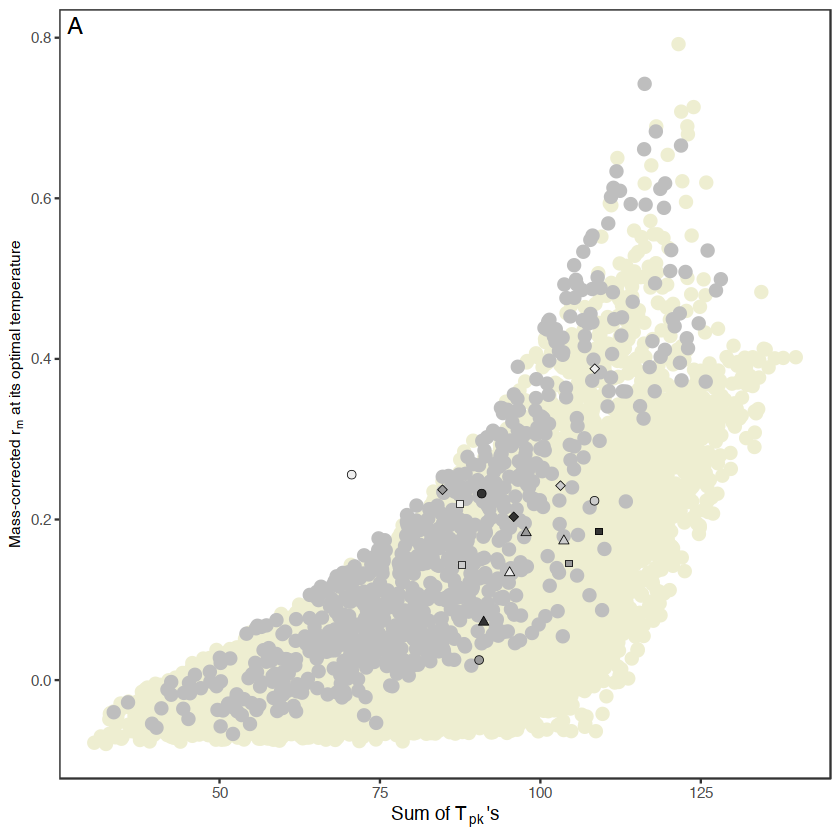

In [13]:
SumTpks_plot <-ggplot() +
  geom_point(data = sim_results_notopt, aes(x = T_pk_sums, y = r_m_opt), color="lightyellow2", size = 3) +
  geom_point(data = sim_results_opt, aes(x = T_pk_sums, y = r_m_opt), color="gray", size = 3) +
  scale_y_continuous(expression(plain(paste("Mass-corrected ",italic(r[m]),
                                            " at its optimal temperature"))),
                     # limits=c(-3.8,-0.5),
                     # expand = c(0.01, 0),breaks=seq(-3,-1, by=1)
                    ) +
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s")))) +
  theme_bw()+
  theme(text=element_text(family="Times")) + 
  geom_point(data = PlotData, aes(x = sum, y = rm_massCor, shape=species, fill=species), 
             size=2, stroke=0.25)+ 
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=16,ncol=1,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=1,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5)) + 
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  theme(panel.grid.minor = element_blank(),
        panel.grid.major = element_blank())+
theme(axis.title.y = element_text(size=9))+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "A"),size = 5, colour = "black")

SumTpks_plot

#ggsave("../results/Figs/rm_vs_SumTpks.pdf", SumTpks_plot, height=6.5, width = 7, units="cm")

## Relationship between $r_{m,opt}$ and $T_{pk}$ of (mass-corrected) $\alpha$ 

In [14]:
# Create argument containing target species
spps <- "case_when(species == 'Anoplophora glabripennis' ~ '1', 
        species == 'Halyomorpha halys' ~ '2', 
        species == 'Aedes aegypti' ~ '3',
        species == 'Anthonomus grandis' ~ '4',
        species == 'Paracoccus marginatus' ~ '5',
        species == 'Acyrthosiphon pisum' ~ '6',
        species == 'Aphis gossypii' ~ '7',
        species == 'Bemisia tabaci' ~ '8',
        species == 'Tetraneura nigriabdominalis' ~ '9',
        species == 'Stethorus punctillum' ~ '10',
        species == 'Tetranychus mcdanieli' ~ '11',
        species == 'Muscidifurax zaraptor' ~ '12',
        species == 'Aphis nasturtii' ~ '13',
        species == 'Rhopalosiphum maidis' ~ '14',
        species == 'Thrips hawaiiensis' ~ '15',
        species == 'Helicoverpa armigera' ~ '16')"


# Read in the trait data
alphaMass <- as_tibble(read.csv('../data/a_pksT_pksMass.csv')) %>% 
  select(species, a_pk, a_pkLwr, a_pkUpr) %>%
  filter(species == 'Anoplophora glabripennis' |
         species == 'Halyomorpha halys' |
         species == 'Aedes aegypti'|
         species == 'Anthonomus grandis' |
         species == 'Paracoccus marginatus' |
         species == 'Acyrthosiphon pisum' |
         species == 'Aphis gossypii' |
         species == 'Bemisia tabaci' |
         species == 'Tetraneura nigriabdominalis' |
         species == 'Stethorus punctillum' |
         species == 'Tetranychus mcdanieli' |
         species == 'Muscidifurax zaraptor' |
         species == 'Aphis nasturtii' |
         species == 'Rhopalosiphum maidis' |
         species == 'Thrips hawaiiensis' |
         species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

alphaMass

alpharm_data <- inner_join(rm_data, alphaMass)
alpharm_data

species,a_pk,a_pkLwr,a_pkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,0.003406889,0.003278209,0.003737209,1
Halyomorpha halys,0.044334971,0.033269822,0.050161298,2
Aedes aegypti,0.199835786,0.179901501,0.220959668,3
Anthonomus grandis,0.118202636,0.099742586,0.148595965,4
Paracoccus marginatus,0.091667630,0.072654088,0.123482971,5
Acyrthosiphon pisum,0.168491626,0.156829340,0.199839979,6
Aphis gossypii,0.221659340,0.210422403,0.228563290,7
Bemisia tabaci,0.082825022,0.077922364,0.093894633,8
Tetraneura nigriabdominalis,0.117949376,0.116956290,0.118881554,9


Joining, by = c("species", "curve_ID")


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,a_pk,a_pkLwr,a_pkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,321.769727,273.845032,1,1.436440,1.129228,1.930424,0.01799820,⋯,0.01,0.01029796,8.208143e-03,0.01269992,159.8000000,38.57209,0.02500296,0.003406889,0.003278209,0.003737209
Halyomorpha halys,29.77477,29.803247,35.241568,26.875962,2,6.254051,4.538958,7.910409,0.01385860,⋯,0.01,0.07630718,6.789109e-02,0.07966526,158.8100000,38.30825,0.18506915,0.044334971,0.033269822,0.050161298
Aedes aegypti,33.10811,5.430507,6.127184,4.917633,3,8.966715,6.927374,10.130595,0.04764627,⋯,0.01,0.19781352,1.832441e-01,0.19485723,1.9991667,37.89130,0.22328108,0.199835786,0.179901501,0.220959668
Anthonomus grandis,29.45946,11.006110,13.750932,9.878442,4,6.292496,5.366498,9.670260,0.04069540,⋯,0.01,0.14365573,1.298938e-01,0.15639103,15.6000000,38.34817,0.23222611,0.118202636,0.099742586,0.148595965
Paracoccus marginatus,27.74775,11.249195,14.172428,9.156689,5,14.925416,10.407681,44.839568,0.05028941,⋯,0.01,0.19174884,1.658434e-01,0.24313226,3.3650000,38.56632,0.23706255,0.091667630,0.072654088,0.123482971
Acyrthosiphon pisum,24.32432,6.716411,7.100553,6.395750,6,7.047066,6.733904,7.496022,0.08542108,⋯,0.01,0.22007128,2.070812e-01,0.23233485,2.3650000,39.01015,0.25581054,0.168491626,0.156829340,0.199839979
Aphis gossypii,28.24324,4.573511,4.802793,4.395092,7,3.206500,2.541898,3.752055,0.12279223,⋯,0.01,0.23529948,2.054818e-01,0.25439696,0.6633333,38.50291,0.21900560,0.221659340,0.210422403,0.228563290
Bemisia tabaci,30.22523,12.226305,13.082061,10.811104,8,9.793602,7.638958,11.773289,0.06851774,⋯,0.01,0.17981067,1.616703e-01,0.19675160,0.2931250,38.25137,0.14509182,0.082825022,0.077922364,0.093894633
Tetraneura nigriabdominalis,29.18919,8.639694,8.708838,8.576657,9,3.037762,2.609647,3.894056,0.08826039,⋯,0.01,0.17766166,1.705671e-01,0.18875533,0.8673000,38.38245,0.17329426,0.117949376,0.116956290,0.118881554


In [15]:
# linear model (note the allometry is linear in log-log scale)
alpharm_model <- lm(log(rm_opt/mass^-0.17) ~ log(a_pk/mass^-0.265), data = alpharm_data)
summary(alpharm_model)
anova(alpharm_model)


Call:
lm(formula = log(rm_opt/mass^-0.17) ~ log(a_pk/mass^-0.265), 
    data = alpharm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63934 -0.20043 -0.01637  0.16665  0.65206 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.2572     0.2669  -0.964    0.352    
log(a_pk/mass^-0.265)   0.7377     0.1218   6.058 2.95e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3409 on 14 degrees of freedom
Multiple R-squared:  0.7238,	Adjusted R-squared:  0.7041 
F-statistic: 36.69 on 1 and 14 DF,  p-value: 2.948e-05


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(a_pk/mass^-0.265),1,4.264355,4.2643554,36.69482,2.948448e-05
Residuals,14,1.626959,0.1162114,NA,NA


`geom_smooth()` using formula 'y ~ x'



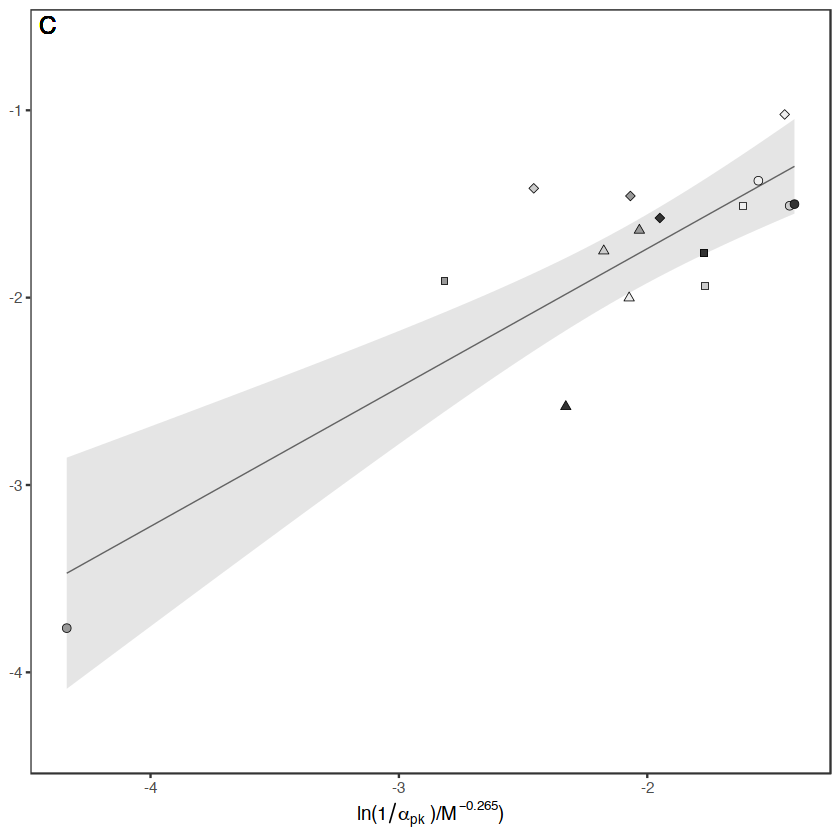

In [16]:
## plot $a_pk$ vs $r_opt$

MassCorr_rm_opt_vs_AlphaTpk <-
  alpharm_data %>%
  ggplot(aes(x=log(a_pk/mass^-0.265), y = log(rm_opt/mass^-0.16)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.16),"))"))),
                     limits=c(-4.5,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(1/alpha[pk])~")/",
                                            italic(M^-0.265),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.4))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "C"),size = 5, colour = "black")+
  theme(axis.title.y = element_blank())
  
#save_plot(MassCorr_rm_opt_vs_AlphaTpk, file="../results/Figs/MassCorr_rm_opt_vs_AlphaTpk.pdf", 
#          base_height=5,base_width = 5, base_asp = 0.75,units="cm")

MassCorr_rm_opt_vs_AlphaTpk

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Saving 7 x 7 in image

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



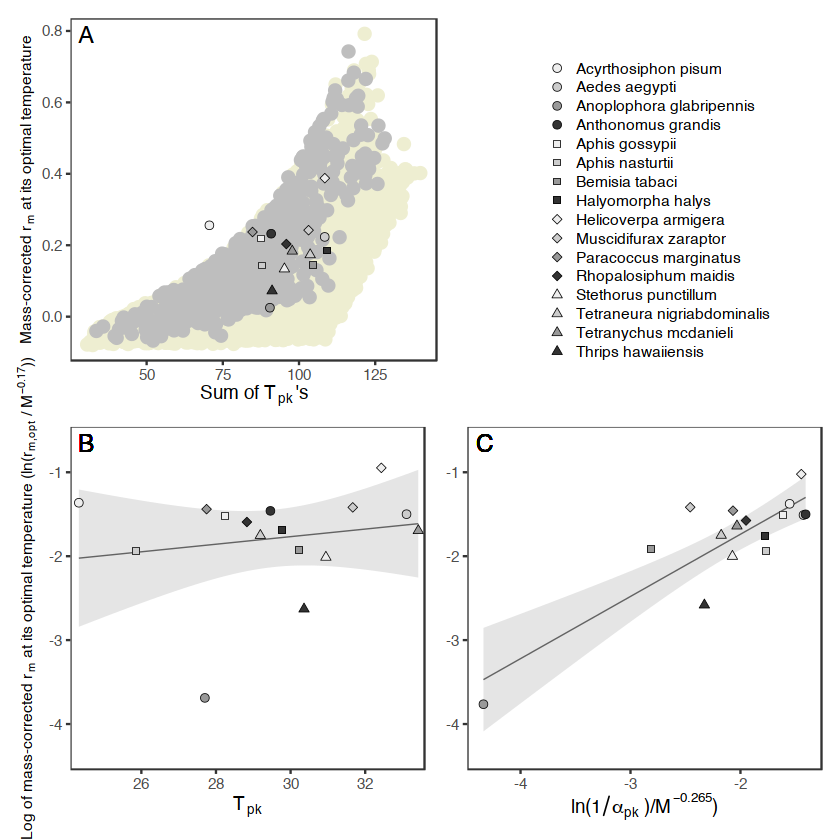

In [17]:
legend <- get_legend(MassCorr_rm_opt_vs_AlphaTpk + theme(legend.position = c(0.525,0.525)))

rm_calcs_Plot <- (SumTpks_plot+legend)/(MassCorr_rm_opt+MassCorr_rm_opt_vs_AlphaTpk)
                                     
rm_calcs_Plot

ggsave(rm_calcs_Plot, file="../results/Figs/rm_vs_SumTpks_rm_vs_Tpk_rm_vs_alphaPk.pdf")

## Relationship between $r_{m,opt}$ and $T_{pk}$s of other (mass-corrected) traits ($b_{max}$, $z$ and $z_J$) 

In [18]:
# bmax (fecundity)

betaMass <- as_tibble(read_csv('../data/bmaxT_pksMass.csv')) %>%
select(species, bmax, bmaxLwr, bmaxUpr) %>%
filter(species == 'Anoplophora glabripennis' |
         species == 'Halyomorpha halys' |
         species == 'Aedes aegypti'|
         species == 'Anthonomus grandis' |
         species == 'Paracoccus marginatus' |
         species == 'Acyrthosiphon pisum' |
         species == 'Aphis gossypii' |
         species == 'Bemisia tabaci' |
         species == 'Tetraneura nigriabdominalis' |
         species == 'Stethorus punctillum' |
         species == 'Tetranychus mcdanieli' |
         species == 'Muscidifurax zaraptor' |
         species == 'Aphis nasturtii' |
         species == 'Rhopalosiphum maidis' |
         species == 'Thrips hawaiiensis' |
         species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  rename(b_maxpk = bmax, b_maxpkLwr = bmaxLwr, b_maxpkUpr = bmaxUpr) %>%
  arrange(curve_ID)

betaMass

betarm_data <- inner_join(rm_data, betaMass)
betarm_data

Rows: 37 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): bmax, bmaxLwr, bmaxUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,b_maxpk,b_maxpkLwr,b_maxpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,1.439853,1.062433,1.976057,1
Halyomorpha halys,7.579694,6.058356,9.481982,2
Aedes aegypti,10.132196,8.801860,11.330932,3
Anthonomus grandis,7.287018,6.035636,10.332508,4
Paracoccus marginatus,26.757230,23.908378,32.417786,5
Acyrthosiphon pisum,7.239118,6.990129,7.778115,6
Aphis gossypii,3.301794,2.871299,4.035766,7
Bemisia tabaci,13.001684,9.696477,18.664881,8
Tetraneura nigriabdominalis,3.079183,2.513541,3.723316,9


Joining, by = c("species", "curve_ID")


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,b_maxpk,b_maxpkLwr,b_maxpkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,321.769727,273.845032,1,1.436440,1.129228,1.930424,0.01799820,⋯,0.01,0.01029796,8.208143e-03,0.01269992,159.8000000,38.57209,0.02500296,1.439853,1.062433,1.976057
Halyomorpha halys,29.77477,29.803247,35.241568,26.875962,2,6.254051,4.538958,7.910409,0.01385860,⋯,0.01,0.07630718,6.789109e-02,0.07966526,158.8100000,38.30825,0.18506915,7.579694,6.058356,9.481982
Aedes aegypti,33.10811,5.430507,6.127184,4.917633,3,8.966715,6.927374,10.130595,0.04764627,⋯,0.01,0.19781352,1.832441e-01,0.19485723,1.9991667,37.89130,0.22328108,10.132196,8.801860,11.330932
Anthonomus grandis,29.45946,11.006110,13.750932,9.878442,4,6.292496,5.366498,9.670260,0.04069540,⋯,0.01,0.14365573,1.298938e-01,0.15639103,15.6000000,38.34817,0.23222611,7.287018,6.035636,10.332508
Paracoccus marginatus,27.74775,11.249195,14.172428,9.156689,5,14.925416,10.407681,44.839568,0.05028941,⋯,0.01,0.19174884,1.658434e-01,0.24313226,3.3650000,38.56632,0.23706255,26.757230,23.908378,32.417786
Acyrthosiphon pisum,24.32432,6.716411,7.100553,6.395750,6,7.047066,6.733904,7.496022,0.08542108,⋯,0.01,0.22007128,2.070812e-01,0.23233485,2.3650000,39.01015,0.25581054,7.239118,6.990129,7.778115
Aphis gossypii,28.24324,4.573511,4.802793,4.395092,7,3.206500,2.541898,3.752055,0.12279223,⋯,0.01,0.23529948,2.054818e-01,0.25439696,0.6633333,38.50291,0.21900560,3.301794,2.871299,4.035766
Bemisia tabaci,30.22523,12.226305,13.082061,10.811104,8,9.793602,7.638958,11.773289,0.06851774,⋯,0.01,0.17981067,1.616703e-01,0.19675160,0.2931250,38.25137,0.14509182,13.001684,9.696477,18.664881
Tetraneura nigriabdominalis,29.18919,8.639694,8.708838,8.576657,9,3.037762,2.609647,3.894056,0.08826039,⋯,0.01,0.17766166,1.705671e-01,0.18875533,0.8673000,38.38245,0.17329426,3.079183,2.513541,3.723316


In [19]:
# linear model (note the allometry is linear in log-log scale)
betarm_model <- lm(log(rm_opt/mass^-0.17) ~ log(bmax/mass^0.08), data = betarm_data)
summary(betarm_model)
anova(betarm_model)


Call:
lm(formula = log(rm_opt/mass^-0.17) ~ log(bmax/mass^0.08), data = betarm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78443 -0.28328  0.07003  0.31449  0.59802 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -2.9001     0.2674 -10.846 3.39e-08 ***
log(bmax/mass^0.08)   0.6556     0.1455   4.507 0.000492 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4143 on 14 degrees of freedom
Multiple R-squared:  0.592,	Adjusted R-squared:  0.5629 
F-statistic: 20.32 on 1 and 14 DF,  p-value: 0.0004922


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(bmax/mass^0.08),1,3.487870,3.4878701,20.31675,0.0004921634
Residuals,14,2.403445,0.1716746,NA,NA


`geom_smooth()` using formula 'y ~ x'



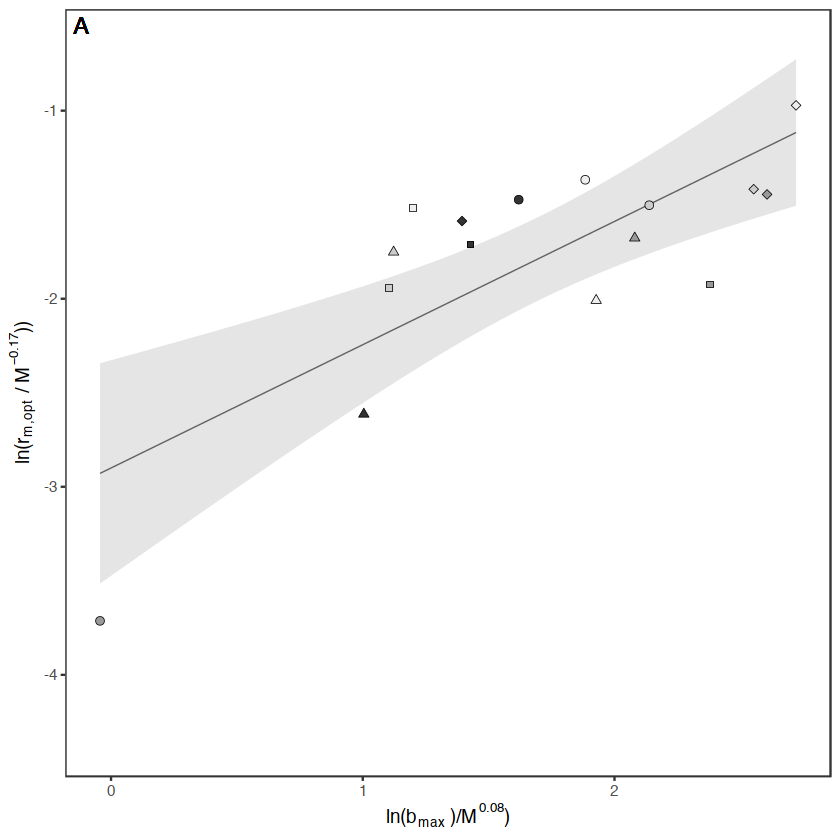

In [20]:
## plot $b_max$ vs $r_opt$

MassCorr_rm_opt_vs_BetaTpk <-
  betarm_data %>%
  ggplot(aes(x=log(bmax/mass^0.08), y = log(rm_opt/mass^-0.17)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.17),"))"))),
                     limits=c(-4.5,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(b[max])~")/",
                                            italic(M^0.08),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.4))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "A"),size = 5, colour = "black")#+
  #theme(axis.title.y = element_blank())
  

MassCorr_rm_opt_vs_BetaTpk

In [21]:
# z (adult mortality rate)

zMass <- as_tibble(read_csv('../data/z_pksT_pksMass.csv')) %>% 
         select(species, zpk, zpkLwr, zpkUpr) %>%
         filter(species == 'Anoplophora glabripennis' |
         species == 'Halyomorpha halys' |
         species == 'Aedes aegypti'|
         species == 'Anthonomus grandis' |
         species == 'Paracoccus marginatus' |
         species == 'Acyrthosiphon pisum' |
         species == 'Aphis gossypii' |
         species == 'Bemisia tabaci' |
         species == 'Tetraneura nigriabdominalis' |
         species == 'Stethorus punctillum' |
         species == 'Tetranychus mcdanieli' |
         species == 'Muscidifurax zaraptor' |
         species == 'Aphis nasturtii' |
         species == 'Rhopalosiphum maidis' |
         species == 'Thrips hawaiiensis' |
         species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

zMass
            

zrm_data <- inner_join(rm_data, zMass)

head(zrm_data)

Rows: 28 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zpk, zpkLwr, zpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,zpk,zpkLwr,zpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,0.006981302,0.008305888,0.006161559,1
Halyomorpha halys,0.004118571,0.004660585,0.002883754,2
Aedes aegypti,0.029080306,0.033112119,0.024339443,3
Anthonomus grandis,0.015650217,0.018247512,0.013764390,4
Paracoccus marginatus,0.021540255,0.026374666,0.019075890,5
Acyrthosiphon pisum,0.025069042,0.026825892,0.018942440,6
Aphis gossypii,0.032803103,0.033886203,0.032410282,7
Bemisia tabaci,0.039444080,0.042068220,0.036339396,8
Tetraneura nigriabdominalis,0.036046880,0.039071041,0.034445430,9


Joining, by = c("species", "curve_ID")


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,zpk,zpkLwr,zpkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,321.769727,273.845032,1,1.436440,1.129228,1.930424,0.01799820,⋯,0.01,0.01029796,0.008208143,0.01269992,159.800000,38.57209,0.02500296,0.006981302,0.008305888,0.006161559
Halyomorpha halys,29.77477,29.803247,35.241568,26.875962,2,6.254051,4.538958,7.910409,0.01385860,⋯,0.01,0.07630718,0.067891094,0.07966526,158.810000,38.30825,0.18506915,0.004118571,0.004660585,0.002883754
Aedes aegypti,33.10811,5.430507,6.127184,4.917633,3,8.966715,6.927374,10.130595,0.04764627,⋯,0.01,0.19781352,0.183244059,0.19485723,1.999167,37.89130,0.22328108,0.029080306,0.033112119,0.024339443
Anthonomus grandis,29.45946,11.006110,13.750932,9.878442,4,6.292496,5.366498,9.670260,0.04069540,⋯,0.01,0.14365573,0.129893787,0.15639103,15.600000,38.34817,0.23222611,0.015650217,0.018247512,0.013764390
Paracoccus marginatus,27.74775,11.249195,14.172428,9.156689,5,14.925416,10.407681,44.839568,0.05028941,⋯,0.01,0.19174884,0.165843411,0.24313226,3.365000,38.56632,0.23706255,0.021540255,0.026374666,0.019075890
Acyrthosiphon pisum,24.32432,6.716411,7.100553,6.395750,6,7.047066,6.733904,7.496022,0.08542108,⋯,0.01,0.22007128,0.207081189,0.23233485,2.365000,39.01015,0.25581054,0.025069042,0.026825892,0.018942440


In [22]:
# linear model (note the allometry is linear in log-log scale)
zrm_model <- lm(log(rm_opt/mass^-0.17) ~ log(zpk/mass^-0.124), data = zrm_data)
summary(zrm_model)
anova(zrm_model)


Call:
lm(formula = log(rm_opt/mass^-0.17) ~ log(zpk/mass^-0.124), data = zrm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6597 -0.1128  0.1364  0.2755  0.5880 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -0.03594    0.65245  -0.055   0.9568  
log(zpk/mass^-0.124)  0.46537    0.16968   2.743   0.0159 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5232 on 14 degrees of freedom
Multiple R-squared:  0.3495,	Adjusted R-squared:  0.303 
F-statistic: 7.522 on 1 and 14 DF,  p-value: 0.01587


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(zpk/mass^-0.124),1,2.058989,2.0589889,7.521762,0.01587445
Residuals,14,3.832326,0.2737376,NA,NA


`geom_smooth()` using formula 'y ~ x'



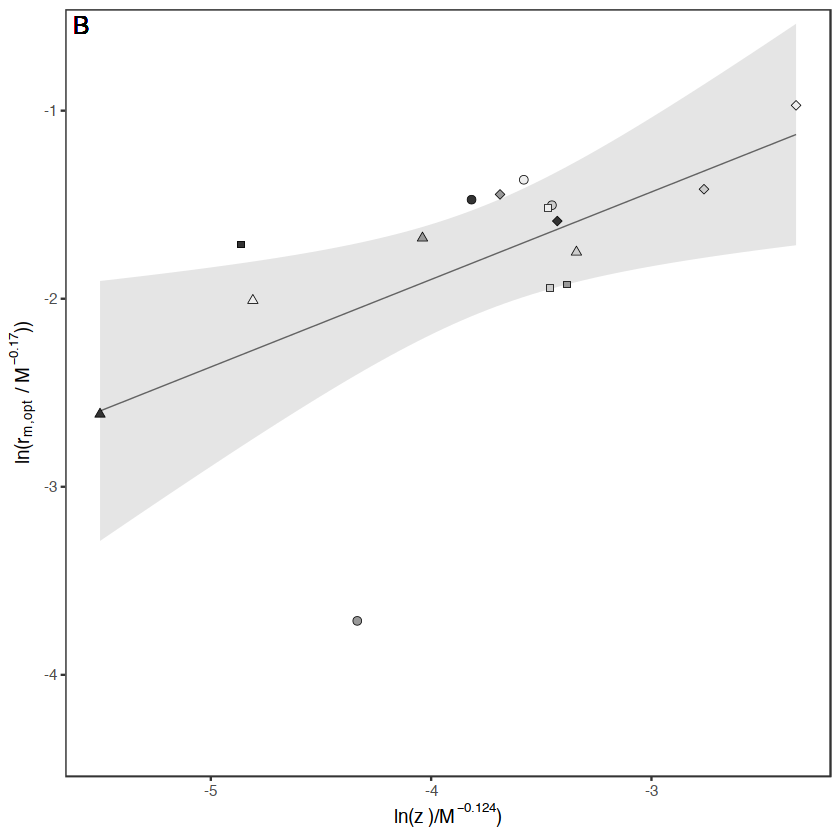

In [23]:
## plot $z$ vs $r_opt$

MassCorr_rm_opt_vs_zTpk <-
  zrm_data %>%
  ggplot(aes(x=log(zpk/mass^-0.124), y = log(rm_opt/mass^-0.17)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.17),"))"))),
                     limits=c(-4.5,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(z)~")/",
                                            italic(M^-0.124),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.4))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "B"),size = 5, colour = "black")#+
  #theme(axis.title.y = element_blank())
  

MassCorr_rm_opt_vs_zTpk

In [24]:
# $z_J$ (juvenile mortality rate)

zJMass <- as_tibble(read_csv('../data/zj_pksT_pksMass.csv')) %>% 
         select(species, zjpk, zjpkLwr, zjpkUpr) %>%
         filter(species == 'Anoplophora glabripennis' |
         species == 'Halyomorpha halys' |
         species == 'Aedes aegypti'|
         species == 'Anthonomus grandis' |
         species == 'Paracoccus marginatus' |
         species == 'Acyrthosiphon pisum' |
         species == 'Aphis gossypii' |
         species == 'Bemisia tabaci' |
         species == 'Tetraneura nigriabdominalis' |
         species == 'Stethorus punctillum' |
         species == 'Tetranychus mcdanieli' |
         species == 'Muscidifurax zaraptor' |
         species == 'Aphis nasturtii' |
         species == 'Rhopalosiphum maidis' |
         species == 'Thrips hawaiiensis' |
         species == 'Helicoverpa armigera') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

zJMass

zJrm_data <- inner_join(rm_data, zJMass)

head(zJrm_data)

Rows: 26 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zjpk, zjpkLwr, zjpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,zjpk,zjpkLwr,zjpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,0.0007652256,0.0008465334,0.0006687937,1
Halyomorpha halys,0.0021342229,0.0024889637,0.0018123241,2
Aedes aegypti,0.0201723996,0.0223306044,0.0185086947,3
Anthonomus grandis,0.0139869798,0.0147449922,0.0131810696,4
Paracoccus marginatus,0.0095941074,0.0127804786,0.0078795072,5
Acyrthosiphon pisum,0.0013182586,0.0013253812,0.0012644875,6
Aphis gossypii,0.0367776165,0.0418016264,0.0335656722,7
Bemisia tabaci,0.0128542251,0.0146309933,0.0095294209,8
Tetraneura nigriabdominalis,0.0093284409,0.0122282070,0.0082085526,9


Joining, by = c("species", "curve_ID")


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,zjpk,zjpkLwr,zjpkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.70270,299.458990,321.769727,273.845032,1,1.436440,1.129228,1.930424,0.01799820,⋯,0.01,0.01029796,0.008208143,0.01269992,159.800000,38.57209,0.02500296,0.0007652256,0.0008465334,0.0006687937
Halyomorpha halys,29.77477,29.803247,35.241568,26.875962,2,6.254051,4.538958,7.910409,0.01385860,⋯,0.01,0.07630718,0.067891094,0.07966526,158.810000,38.30825,0.18506915,0.0021342229,0.0024889637,0.0018123241
Aedes aegypti,33.10811,5.430507,6.127184,4.917633,3,8.966715,6.927374,10.130595,0.04764627,⋯,0.01,0.19781352,0.183244059,0.19485723,1.999167,37.89130,0.22328108,0.0201723996,0.0223306044,0.0185086947
Anthonomus grandis,29.45946,11.006110,13.750932,9.878442,4,6.292496,5.366498,9.670260,0.04069540,⋯,0.01,0.14365573,0.129893787,0.15639103,15.600000,38.34817,0.23222611,0.0139869798,0.0147449922,0.0131810696
Paracoccus marginatus,27.74775,11.249195,14.172428,9.156689,5,14.925416,10.407681,44.839568,0.05028941,⋯,0.01,0.19174884,0.165843411,0.24313226,3.365000,38.56632,0.23706255,0.0095941074,0.0127804786,0.0078795072
Acyrthosiphon pisum,24.32432,6.716411,7.100553,6.395750,6,7.047066,6.733904,7.496022,0.08542108,⋯,0.01,0.22007128,0.207081189,0.23233485,2.365000,39.01015,0.25581054,0.0013182586,0.0013253812,0.0012644875


In [25]:
# linear model (note the allometry is linear in log-log scale)
zJrm_model <- lm(log(rm_opt/mass^-0.17) ~ log(zjpk/mass^-0.193), data = zJrm_data)
summary(zJrm_model)
anova(zJrm_model)


Call:
lm(formula = log(rm_opt/mass^-0.17) ~ log(zjpk/mass^-0.193), 
    data = zJrm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60485 -0.13514  0.09607  0.26030  0.79874 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)
(Intercept)            -0.7777     0.7756  -1.003    0.333
log(zjpk/mass^-0.193)   0.2148     0.1615   1.330    0.205

Residual standard error: 0.6112 on 14 degrees of freedom
Multiple R-squared:  0.1122,	Adjusted R-squared:  0.04874 
F-statistic: 1.769 on 1 and 14 DF,  p-value: 0.2048


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(zjpk/mass^-0.193),1,0.660781,0.6607810,1.768641,0.2048119
Residuals,14,5.230534,0.3736096,NA,NA


`geom_smooth()` using formula 'y ~ x'



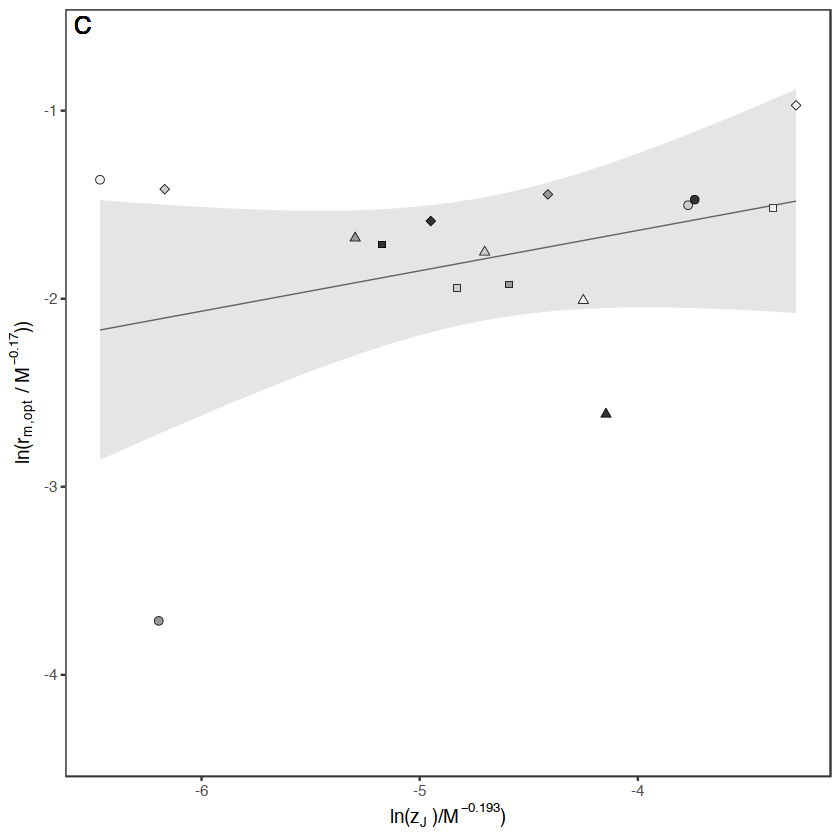

In [26]:
## plot $z_J$ vs $r_opt$

MassCorr_rm_opt_vs_zJTpk <-
  zJrm_data %>%
  ggplot(aes(x=log(zjpk/mass^-0.193), y = log(rm_opt/mass^-0.17)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.17),"))"))),
                     limits=c(-4.5,-0.5),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(z[J])~")/",
                                            italic(M^-0.193),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.4))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "C"),size = 5, colour = "black")#+
  #theme(axis.title.y = element_blank())
  

MassCorr_rm_opt_vs_zJTpk

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Saving 7 x 7 in image

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



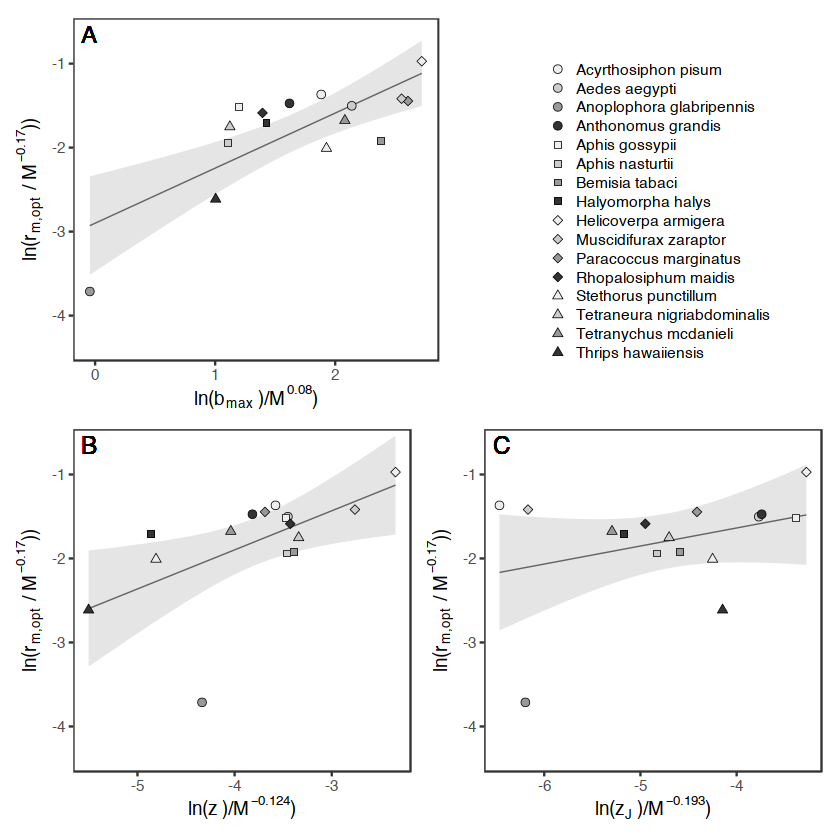

In [27]:
legend <- get_legend(MassCorr_rm_opt_vs_AlphaTpk + theme(legend.position = c(0.525,0.525)))

rm_vs_OtherTraitPks <- (MassCorr_rm_opt_vs_BetaTpk+legend)/
                       (MassCorr_rm_opt_vs_zTpk+MassCorr_rm_opt_vs_zJTpk)
                                     
rm_vs_OtherTraitPks

ggsave(rm_vs_OtherTraitPks, file="../results/SI/rm_vs_OtherTraitPks.pdf")

## $r_m$ vs Variance of trait  $T_{pk}$s 

In [28]:
VarLM <-   lm(PlotData$rm_massCor ~ PlotData$variance)

summary(VarLM)


Call:
lm(formula = PlotData$rm_massCor ~ PlotData$variance)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.166766 -0.047365  0.001854  0.043439  0.194782 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)        1.971e-01  6.972e-02   2.827   0.0135 *
PlotData$variance -8.912e-05  1.037e-03  -0.086   0.9327  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08495 on 14 degrees of freedom
Multiple R-squared:  0.0005273,	Adjusted R-squared:  -0.07086 
F-statistic: 0.007386 on 1 and 14 DF,  p-value: 0.9327


`geom_smooth()` using formula 'y ~ x'



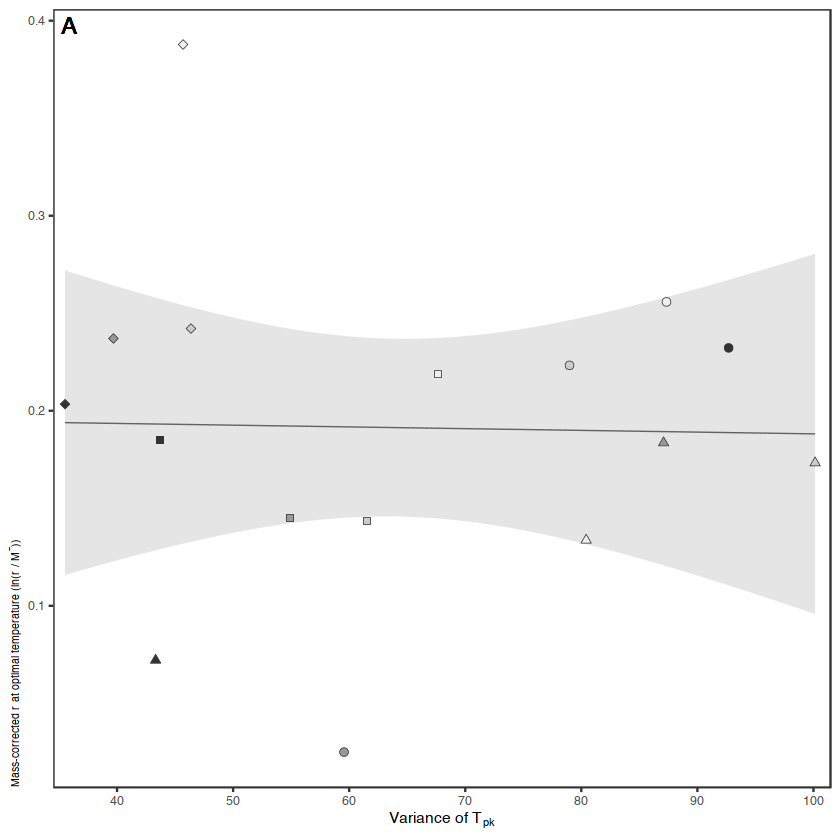

In [32]:
Var_rm <- ggplot(PlotData, aes(x=variance, y=rm_massCor, colour = species, fill = species)) +
  scale_x_continuous(expression(plain(paste("Variance of ", italic(T)[pk]))),
                     limits =c(34.5,101.5),
                     expand = c(0, 0),
                     breaks=seq(40,100, by=10))+
  scale_y_continuous(expression(plain(paste("Mass-corrected ",italic(r[m]),
                                            " at optimal temperature (ln(",italic(r[paste(m,",", opt)]),
                                            " / ", italic(M^-0.17),"))"))))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  geom_point(aes(shape=species, 
                 fill=species), size=2,stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=8,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=9),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.title.y = element_text(size=6, hjust=0))+
geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "A"),size = 5, colour = "black")

  
Var_rm

## Relationship between Sum and Variance of trait $T_{pk}$'s 

`geom_smooth()` using formula 'y ~ x'



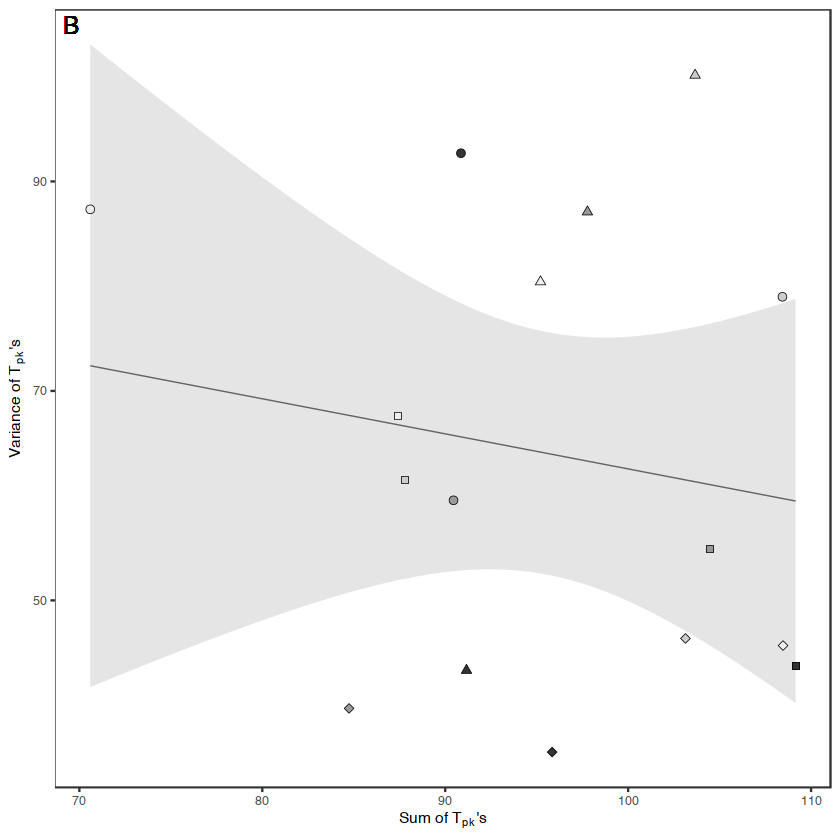

In [33]:
Sum_vs_Var_Tpks_plot <- PlotData %>%
  ggplot(aes(x = sum, y = variance))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("Variance of ",italic("T"[pk]),"'s"))))+
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=8,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=9),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.5,vjust=1.4,
                label = "B"),size = 5, colour = "black")+
  theme(axis.title.y = element_text(hjust=0.5), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

Sum_vs_Var_Tpks_plot

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



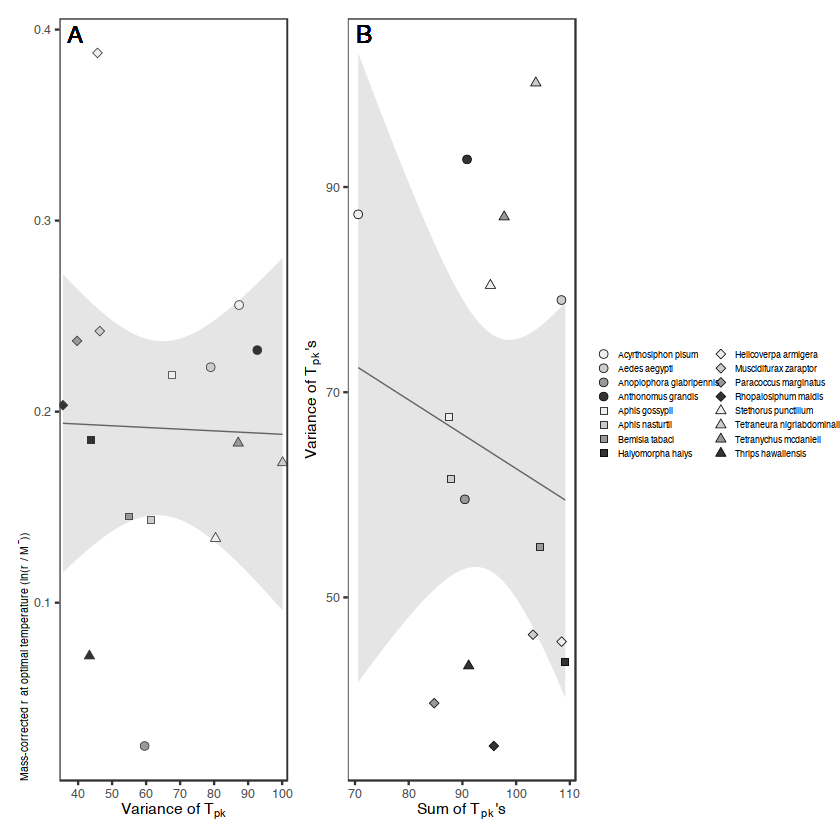

In [34]:
legendz <- get_legend(Sum_vs_Var_Tpks_plot + theme(legend.position = c(0.525,0.525), 
                     legend.text = element_text(size = 5, face = 'italic')))

rm_vs_Var_and_Sum <- (Var_rm+Sum_vs_Var_Tpks_plot+legendz)
                                     
rm_vs_Var_and_Sum

ggsave(rm_vs_Var_and_Sum, file="../results/SI/rm_vs_Var_and_Sum.pdf", height=6.5, width = 20, units="cm")